#Analisis exploratorio de los datos

Codebook para llevar a cabo el analisís preliminar de los datos obtenidos mediante la tecnica web-scrapping sobre [Mercado Libre Colombia](https://carros.mercadolibre.com.co/usados)



### Librerias necesarias

In [14]:
import pandas as pd                #Importamos pandas para el manejo de los dataframes
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                 #Importamos la librería numpy para manipular arreglos. 

Proceso para importar datos recolectados alojados en la nube (Google Drive)

In [15]:
url = 'https://drive.google.com/file/d/1sNpJY44MTuq75eDKNTn2EZiG3lydLUeM/view?usp=sharing'
data = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(data)

Revisión de la información básica del dataset y tipos de datos mapeados en el mismo

In [16]:
print('(Número de observaciones, número de atributos) = {}\n'.format(df.shape))
df.info()

(Número de observaciones, número de atributos) = (27929, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27929 entries, 0 to 27928
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bodywork_type  22701 non-null  object 
 1   brand          27833 non-null  object 
 2   city           27929 non-null  object 
 3   color          16073 non-null  object 
 4   doors          27788 non-null  float64
 5   fuel_type      27830 non-null  object 
 6   kilometers     27833 non-null  float64
 7   model          27833 non-null  object 
 8   motor          22829 non-null  object 
 9   price          27929 non-null  int64  
 10  state          27929 non-null  object 
 11  transmission   27833 non-null  object 
 12  year           27833 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 2.8+ MB


Definición del tipo de dato adecuado para cada variable

In [17]:
df['bodywork_type'] = df['bodywork_type'].astype("string")
df['brand'] = df['brand'].astype("string")
df['color'] = df['color'].astype("string")
df['doors'] = df['doors'].astype("string")
df['fuel_type'] = df['fuel_type'].astype("string")
df['kilometers'] = df['kilometers'].astype("float64")
df['model'] = df['model'].astype("string")
df['motor'] = df['motor'].astype("string")
df['price'] = df['price'].astype('float64')
df['transmission'] = df['transmission'].astype('string')
df['year'] = df['year'].astype("string")
df['state'] = df['state'].astype('string')
df['city'] = df['city'].astype('string')

Verificación de la asignación de tipos realizada

In [18]:
print(df.dtypes)

bodywork_type     string
brand             string
city              string
color             string
doors             string
fuel_type         string
kilometers       float64
model             string
motor             string
price            float64
state             string
transmission      string
year              string
dtype: object


**Primer análisis exploratorio sobre variables continuas actuales**

In [19]:
df.describe()

,kilometers,price
count,2.783300e+04,2.792900e+04
mean,9.055621e+04,7.177380e+07
std,1.443806e+05,7.111876e+07
min,0.000000e+00,1.500000e+06
25%,3.800000e+04,3.480000e+07
50%,7.500000e+04,5.200000e+07
75%,1.200000e+05,8.600000e+07
max,1.545645e+07,3.100000e+09


Verificación de inconsistencias en el dataset 

In [20]:
print('¿El conjunto de datos tiene nan?',df.isnull().values.any(),'\n')
print('¿Cuántos nan tiene en total?', df.isnull().sum().sum(),'\n')

diccionario_de_nan = {}
for atributo in df.columns.values:
  diccionario_de_nan[atributo]=df[atributo].isnull().sum()
print('¿Cómo están distribuidos los nan?\n',diccionario_de_nan)

¿El conjunto de datos tiene nan? True 

¿Cuántos nan tiene en total? 22904 

¿Cómo están distribuidos los nan?
 {'bodywork_type': 5228, 'brand': 96, 'city': 0, 'color': 11856, 'doors': 141, 'fuel_type': 99, 'kilometers': 96, 'model': 96, 'motor': 5100, 'price': 0, 'state': 0, 'transmission': 96, 'year': 96}


In [27]:
df = df.fillna(method='ffill')

# Visualización de los datos

# Nueva sección

Figura 1. Histograma de los tipos de transmisión

Text(0.5, 1.0, 'Histograma')

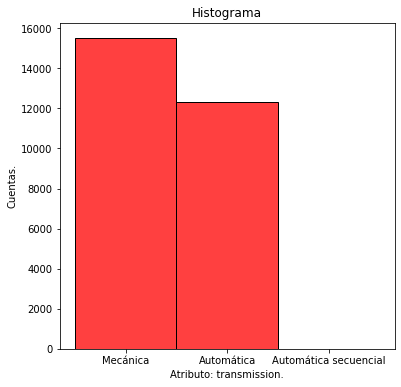

In [ ]:
#Ahora generemos el histograma usando la librería seaborn.
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        ='transmission',
             bins     = 30,
             color    = 'red',
             fill     = True,
             stat     = 'count')    #'count' muestra el número de observaciones.
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: transmission.') #Texto en el eje x.
plt.ylabel('Cuentas.')              #Texto en el eje y.
plt.title('Histograma')  

Figura 2. Histograma de los tipos de combustible

Text(0.5, 1.0, 'Histograma')

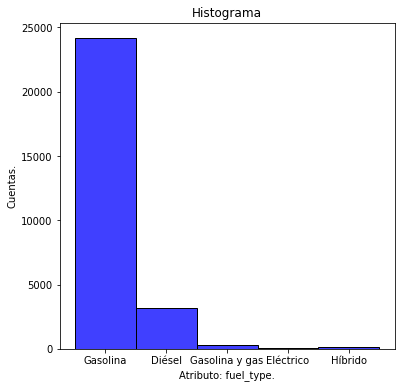

In [ ]:
#Ahora generemos el histograma usando la librería seaborn.
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        ='fuel_type',
             bins     = 30,
             color    = 'blue',
             fill     = True,
             stat     = 'count')    #'count' muestra el número de observaciones.
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: fuel_type.') #Texto en el eje x.
plt.ylabel('Cuentas.')              #Texto en el eje y.
plt.title('Histograma') 

Figura 3. Histograma del número de puertas

Text(0.5, 1.0, 'Histograma')

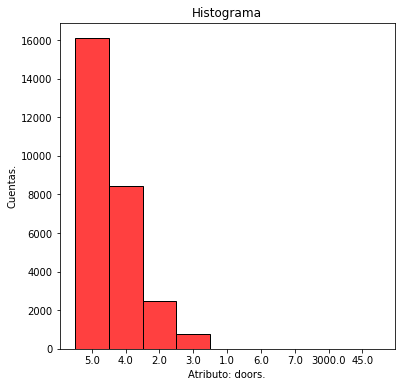

In [ ]:
#Ahora generemos el histograma usando la librería seaborn.
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        ='doors',
             bins     = 30,
             color    = 'red',
             fill     = True,
             stat     = 'count')    #'count' muestra el número de observaciones.
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: doors.') #Texto en el eje x.
plt.ylabel('Cuentas.')              #Texto en el eje y.
plt.title('Histograma') 

Text(0.5, 1.0, 'Histograma')

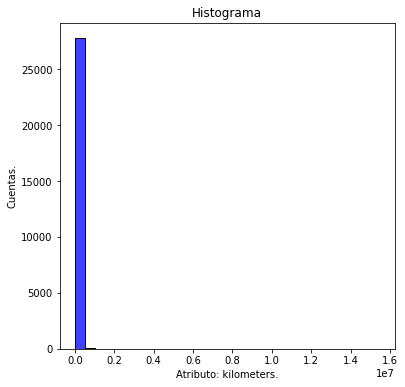

In [ ]:
#Ahora generemos el histograma usando la librería seaborn.
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        ='kilometers',
             bins     = 30,
             color    = 'blue',
             fill     = True,
             stat     = 'count')    #'count' muestra el número de observaciones.
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: kilometers.') #Texto en el eje x.
plt.ylabel('Cuentas.')              #Texto en el eje y.
plt.title('Histograma') 

Figura 4. Gráfico de dispersión de kilometraje y precio coloreado de acuerdo al tipo de combustible

In [ ]:
#Vamos a generar otro gráfico exploratorio muy común, pero esta vez vamos a utilizar la librería altair.

import altair as alt   #Altair: Declarative Visualization in Python. https://altair-viz.github.io

alt.Chart(df).mark_point().encode(
  x='kilometers',
  y='price',
  color='fuel_type'
).interactive()

MaxRowsError: ignored

alt.Chart(...)

Figura 5. Diagrama de caja para el kilometraje

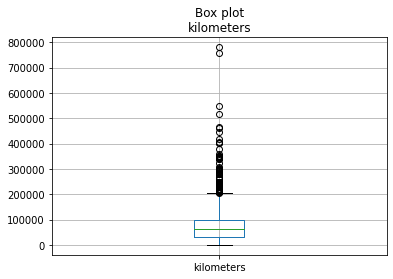

In [ ]:
plt.title('Box plot\n'+str(df.columns[5]))

df.boxplot(column='kilometers')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=511ee041-b4b1-4cd3-b8ea-b2652010eed2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>